In [1]:
import numpy as np
import pandas as pd
import rasterio
import geopandas as gpd
import matplotlib.pyplot as pp
import seaborn as sns

In [43]:
# 477 actual methodology data for Colorado
co_broadband = pd.read_csv("./Data/CO_201906.csv")

# Loading Colorado census blocks shapefile
# Download from https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html
co_shp = gpd.read_file("./Data/shapefiles/censusblocks/co/tl_2019_08_tabblock10.shp");

# Loading US states shapefile
# Download from https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html
states_shp = gpd.read_file("./Data/shapefiles/states/tl_2019_us_state.shp");
states_shp = states_shp.set_index("NAME")

# Combining the two into one dataframe
def merge_data(shp,bbnd):
    shp = shp.set_index("GEOID10")
    shp.index = shp.index.map(int)
    
    bbnd = bbnd.set_index("FIPS")
    bbnd.index = bbnd.index.map(int)
    return shp.merge(bbnd,left_index=True, right_index=True, how="inner")

co_merged = merge_data(co_shp,co_broadband)

Text(0.5, 1, '4G LTE Coverage in Colorado')

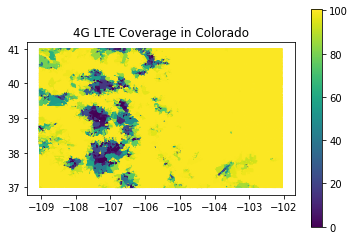

In [44]:
# Quick peek at 4G coverage in CO
co_merged.plot(cmap="viridis",legend=True,column="4G_LTE",edgecolor="face", linewidth=1)
pp.title("4G LTE Coverage in Colorado")